# Table of Contents

## Import Data and Libraries
## Create Subset for Visual Analysis
## Create Correlation Heatmap
## Create Scatterplots 
## Create Pair Plot
## Create a Categorical Pair Plot
## Revisit Previous Questions
## Bonus: Additional Data Set Merges
## Define Hypotheses

# Import Data and Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# check jupiter version
matplotlib.__version__

'3.5.1'

In [3]:
# create path
path = r'C:\Users\18602\Documents\Data Analytics\Data Immersion\Month 6\A6 Project\02 Data\Prepared Data'

In [4]:
# import data
df = pd.read_csv(os.path.join(path,'dfhappy_clean.csv'))

In [6]:
suicide = pd.read_csv(os.path.join(path, 'suicidehappy.csv'))

In [7]:
# check output
df.head()

,Unnamed: 0,Rank,Country,Score,Economy,Social Support,Life Expectancy,Freedom,Government Trust,Generosity,Year
0,0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [6]:
# create new data frame without unnamed: 0
df = df[['Rank','Country','Score','Economy','Social Support','Life Expectancy','Freedom','Government Trust','Generosity','Year']]

In [7]:
# check output
df.head()

,Rank,Country,Score,Economy,Social Support,Life Expectancy,Freedom,Government Trust,Generosity,Year
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,5,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


# Create Subset for Visual Analysis

In [8]:
# view columns
df.columns

Index(['Rank', 'Country', 'Score', 'Economy', 'Social Support',
       'Life Expectancy', 'Freedom', 'Government Trust', 'Generosity', 'Year'],
      dtype='object')

In [9]:
# create subset
df2 = df[['Economy','Social Support','Life Expectancy','Freedom','Government Trust','Generosity']]

# Create Correlation Heatmap

In [10]:
# create correlation matrix
df2.corr()

,Economy,Social Support,Life Expectancy,Freedom,Government Trust,Generosity
Economy,1.000000,-0.305719,0.992811,0.785836,0.878179,-0.626813
Social Support,-0.305719,1.000000,-0.359766,-0.044966,-0.326908,0.211691
Life Expectancy,0.992811,-0.359766,1.000000,0.773244,0.881829,-0.626545
Freedom,0.785836,-0.044966,0.773244,1.000000,0.733128,-0.342672
Government Trust,0.878179,-0.326908,0.881829,0.733128,1.000000,-0.537360
Generosity,-0.626813,0.211691,-0.626545,-0.342672,-0.537360,1.000000


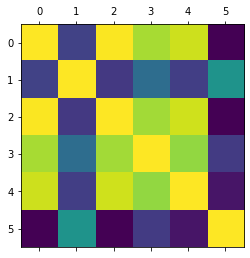

In [11]:
# create heatmap
plt.matshow(df2.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

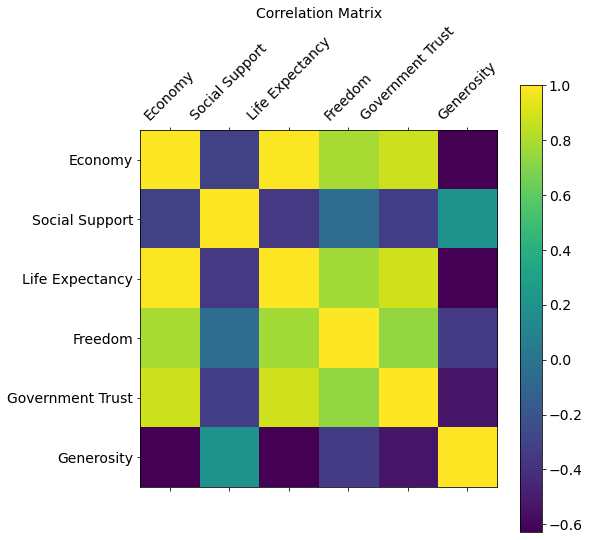

In [12]:
# create detailed correlation heatmap
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df2.corr(), fignum=f.number) # type of plot
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

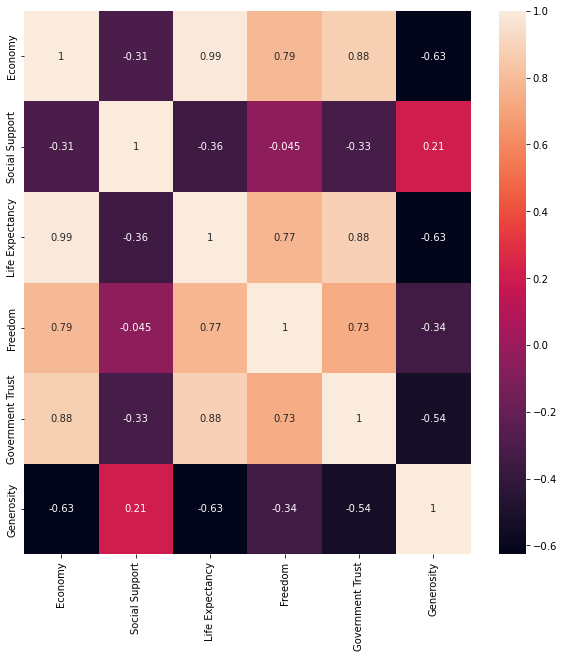

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df2.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

There are many strong correlations in this heat map. The strongest one being the relationship between life expectancy and economy, which makes sense. Rich economies are more likely to have access to things that extend life (healthcare, quality food, a lower stress lifestyle, etc.) However, there are some other relationships that are not as strong, but exist. For example, there's a negative relationship between life expectancy and generosity. While giving away money doesn't directly lead to death, we can look and see that the richer economies (the ones that live longer) are overall less generous. 
Here are the significant relationships:
<br>Life Expectancy and Economy: .99
<br> Government Trust and Economy: .88
<br> Government Trust and Life Expectancy: .88
<br> Freedom and Economy: .79
<br> Freedom and Life Expectancy: .77
<br> Freedom and Government Trust: .73
<br> Government Trust and Generosity: -.54
<br> Generosity and Economy: -.63
<br> Generosity and Life Expectancy: -.63

# Create Scatterplots

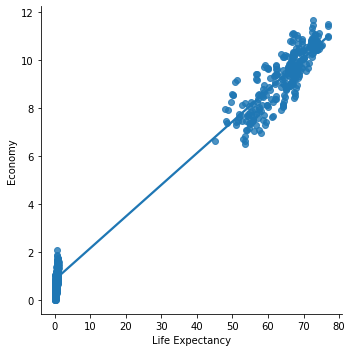

In [14]:
# Scatterplot of life expectancy and economy

sns.lmplot(x = 'Life Expectancy', y = 'Economy', data = df)

This one has the strongest, clearest relationship and there's a logical connection between the variables.

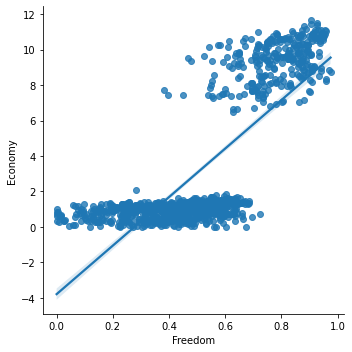

In [15]:
# Create a scatterplot for the Freedom and Economy

sns.lmplot(x = 'Freedom', y = 'Economy', data = df2)

This one is surprising to me as there is a large gap in economies. One aspect to note is that all economies of a 6 or higher have a high level of freedom. All good economies have a high level of freedom but not all poorer economies have less freedom.

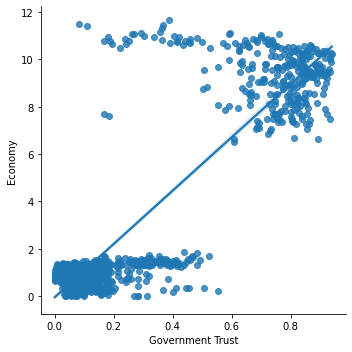

In [16]:
# Create a scatterplot for the Freedom and Economy

sns.lmplot(x = 'Government Trust', y = 'Economy', data = df2)

This chart has a relationship but there are also many outliers. 

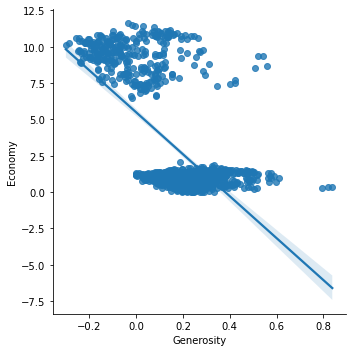

In [17]:
# create a scatterplot for generosity and economy
sns.lmplot(x = 'Generosity', y = 'Economy', data = df2)

This is the interesting one. The higher economies are less generous. There could be a number or reasons as to why that is. Maybe in poorer economies people share more because the poverty is more visible. However, it could also be an insignificant relationships depending on how the generosity is weighted.

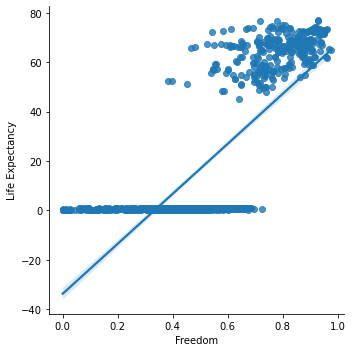

In [18]:
# create a scatterplot for freedom and life expectancy
sns.lmplot(x = 'Freedom',y = 'Life Expectancy',data = df2)

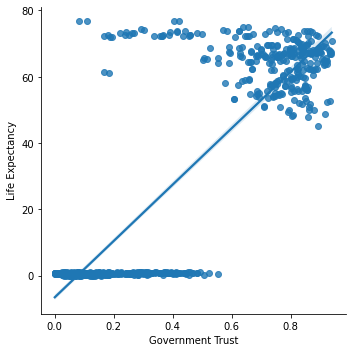

In [19]:
# create a scatterplot for government trust and life expectancy
sns.lmplot(x = 'Government Trust', y = 'Life Expectancy', data = df2)

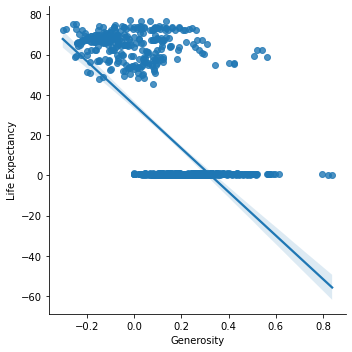

In [20]:
# create a scatterplot tracking generosity and life expectancy
sns.lmplot(x = 'Generosity',y= 'Life Expectancy', data = df2)

This is a scatterplot that could quickly be misinterpreted. Generous countries to not have as high a life expectancy could lead someone to say generous people die younger. All this shows is that economies that are more generous have a lower life expectancy. However there are outliers with this as well.

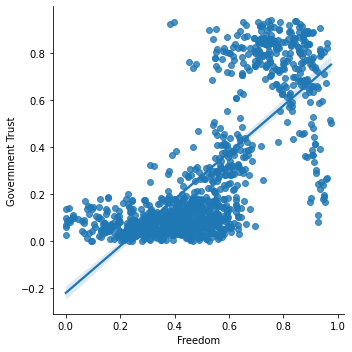

In [21]:
# create a scatterplot with freedom and government trust
sns.lmplot(x= 'Freedom',y='Government Trust',data = df2)

This plot has a very steep trend but still many outliers.

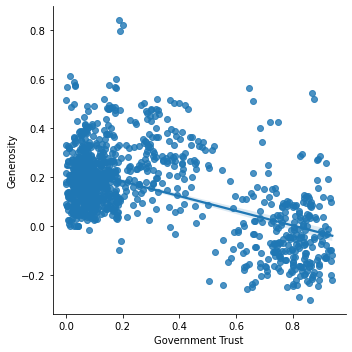

In [22]:
# create a scatterplot with government trust and generosity
sns.lmplot(x='Government Trust',y='Generosity',data = df2)

This one does not have as clear a trend has has many outliers.

# Create Pair Plot

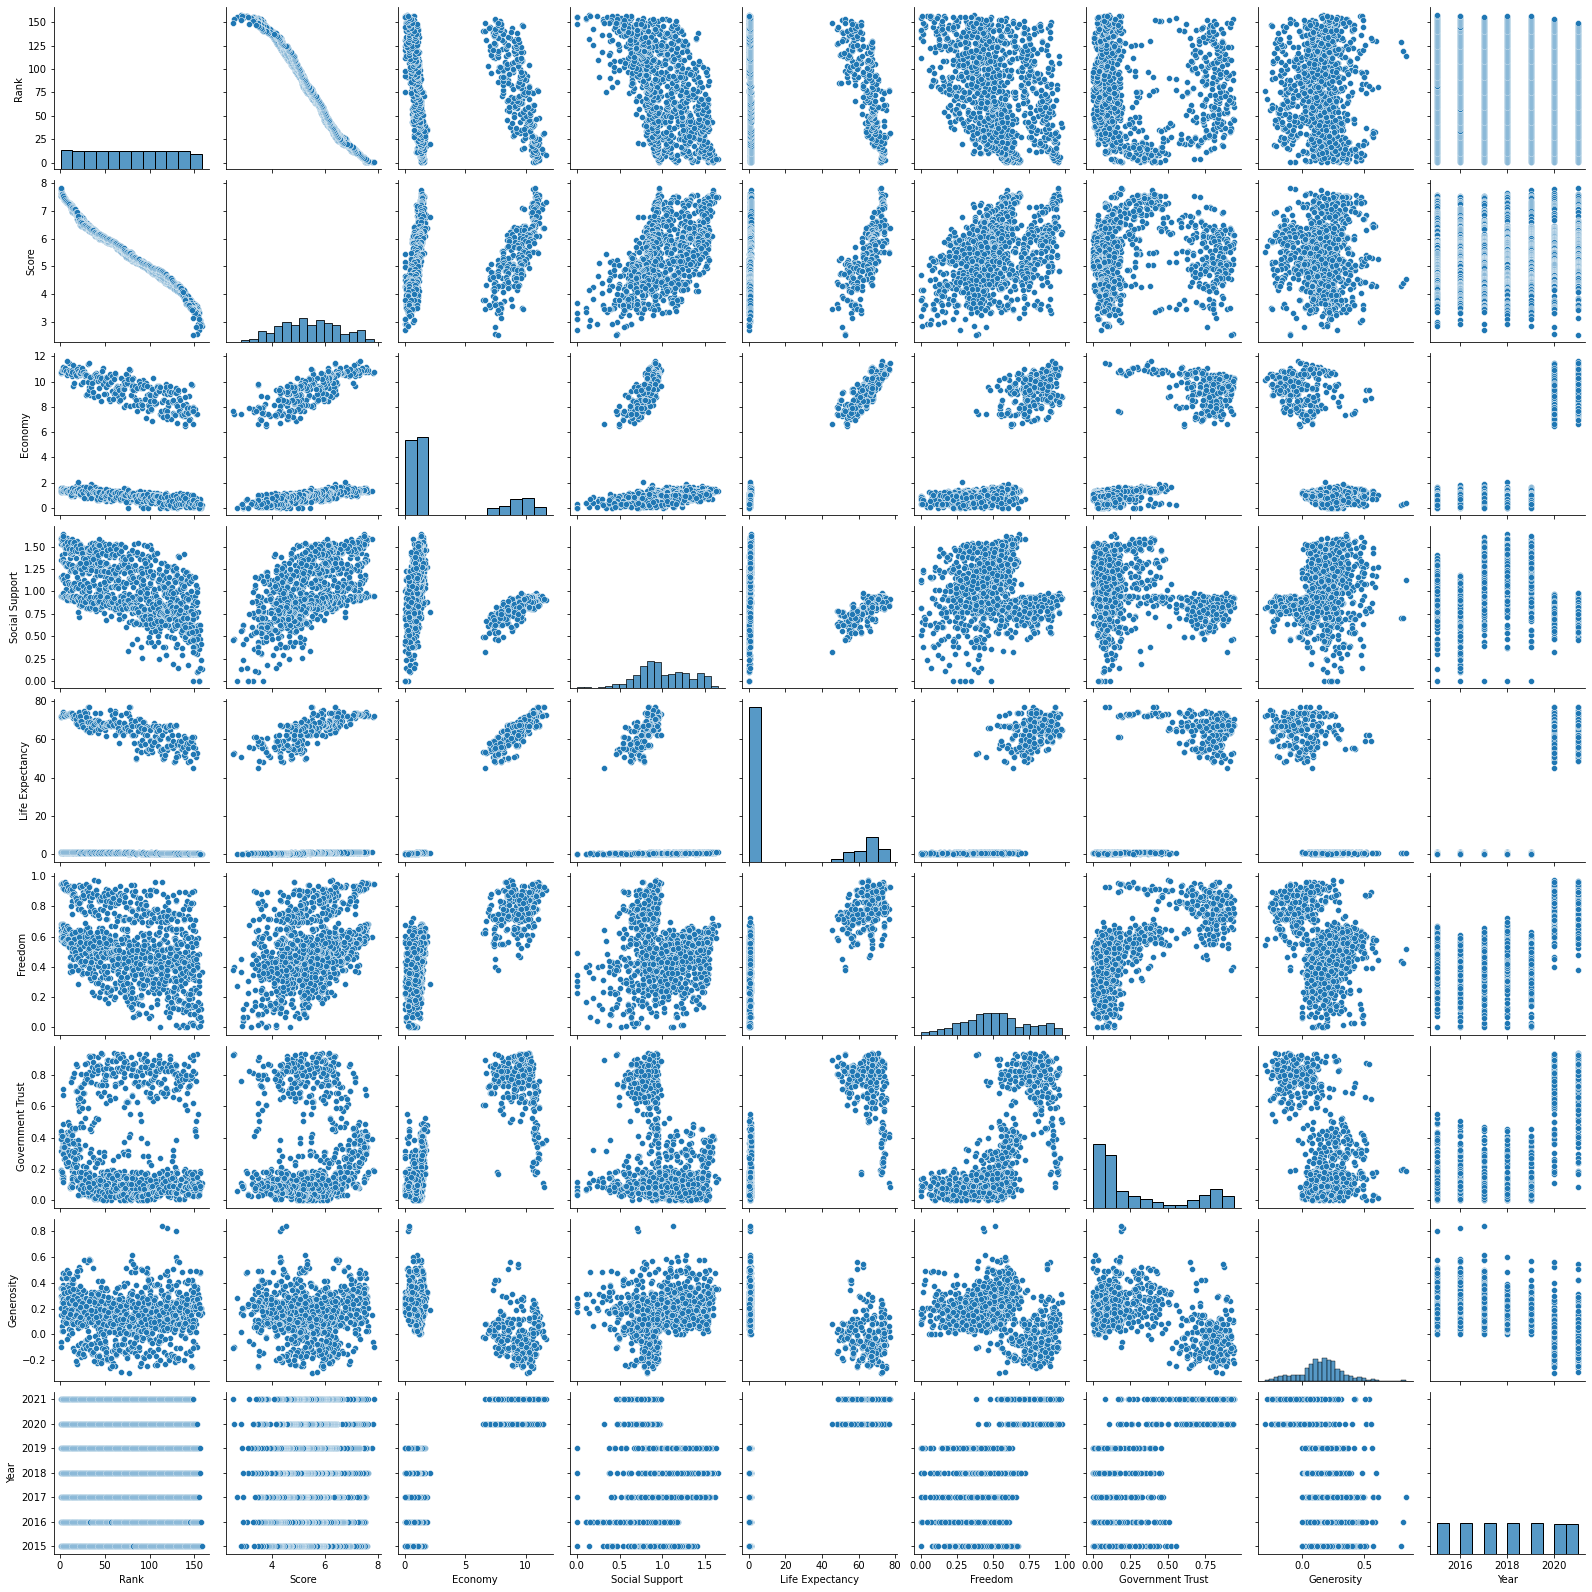

In [23]:
# Create a pair plot 

g = sns.pairplot(df)

# Create a Categorical Pair Plot

<AxesSubplot:xlabel='Economy', ylabel='Count'>

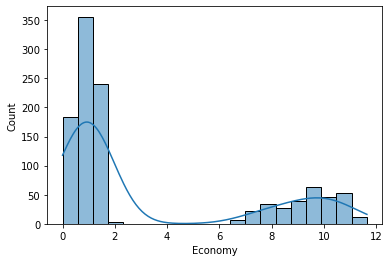

In [24]:
# create a histogram of economies
sns.histplot(df['Economy'], bins = 20, kde = True)

In [25]:
df.loc[df['Economy'] < 5, 'Economy Range'] = 'Low Economy'

In [26]:
df.loc[(df['Economy'] > 4) & (df['Economy'] < 9), 'Economy Range'] = 'Mid Economy'

In [27]:
df.loc[df['Economy'] >8, 'Economy Range'] = 'High Economy'

In [28]:
# check value counts
df['Economy Range'].value_counts()

Low Economy     782
High Economy    252
Mid Economy      50
Name: Economy Range, dtype: int64

In [29]:
# find another variable to make a measure
df.columns

Index(['Rank', 'Country', 'Score', 'Economy', 'Social Support',
       'Life Expectancy', 'Freedom', 'Government Trust', 'Generosity', 'Year',
       'Economy Range'],
      dtype='object')

In [30]:
df['Score'].describe()

count    1084.000000
mean        5.413460
std         1.118595
min         2.523000
25%         4.571000
50%         5.385150
75%         6.216125
max         7.842000
Name: Score, dtype: float64

In [31]:
# create flag for score ranges
df.loc[df['Score'] <= 2.49, 'Score Range'] = 2

In [32]:
df.loc[(df['Score'] >=2.5) & (df['Score'] <=3.49), 'Score Range'] = 3

In [33]:
df.loc[(df['Score'] >=3.5) & (df['Score'] <=4.49), 'Score Range'] = 4

In [34]:
df.loc[(df['Score'] >=4.5) & (df['Score'] <=5.49), 'Score Range'] = 5

In [35]:
df.loc[(df['Score'] >=5.5) & (df['Score'] <=6.49), 'Score Range'] = 6

In [36]:
df.loc[(df['Score'] >=6.5) & (df['Score'] <=7.49), 'Score Range'] = 7

In [37]:
df.loc[(df['Score'] >=7.5) & (df['Score'] <=8.49), 'Score Range'] = 8

In [38]:
df.loc[df['Score'] >=8.5, 'Score Range'] = 8

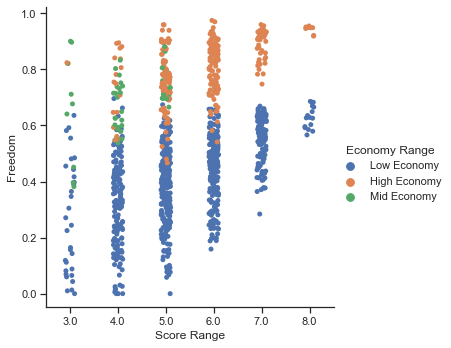

In [39]:
# create visual for economy range and generosity
sns.set(style='ticks')
g = sns.catplot(x='Score Range', y='Freedom', hue='Economy Range', data=df)

# Revisit Previous Questions

What countries are getting happier? 
<br> This question will be answered in a time series analysis but is not a correlational question.

What developed and undeveloped countries are the happiest? <br>This analysis did not look at individual countries. Also developed and undeveloped most be more clearly defined.

What countries are the most generous? <br>Ones with a lower GDP

Are countries that trust the government richer? <br>Yes

# Bonus: Additional Dataset Merges

In [8]:
# check data output
suicide.head()

,Rank,Country,Score,Economy,Social Support,Life Expectancy,Freedom,Government Trust,Generosity,Year,country-year,suicides_no
0,1,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015,Switzerland2015,1073
1,2,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015,Iceland2015,40
2,3,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015,Denmark2015,564
3,4,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015,Norway2015,590
4,6,Finland,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015,Finland2015,731


This data was originally supposed to play a significant role in this analysis. However, I realized that there were only approximately 70 rows that matched in terms of year and country, so the value is limited. This is mostly to satisfy my own curiousity. If the data is results are interesting I may look for more.

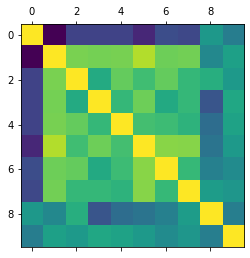

In [11]:
# correlational analysis with suicide data
# create heatmap
plt.matshow(suicide.corr())
plt.show()

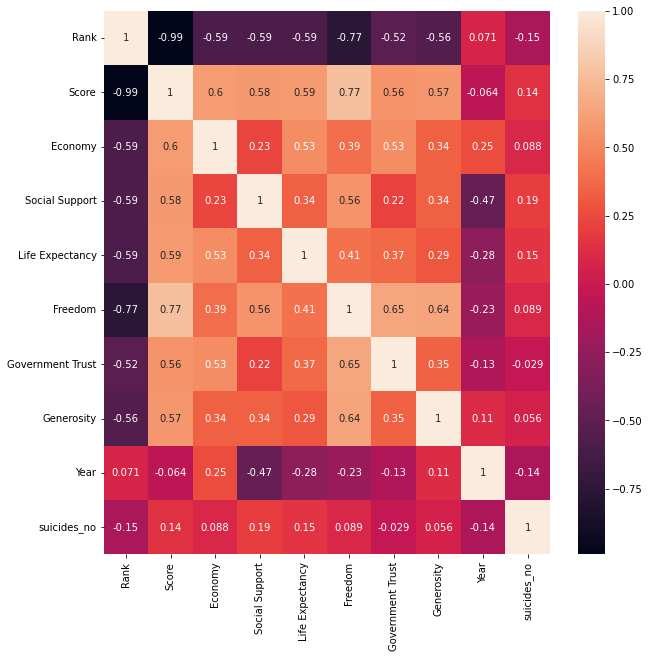

In [12]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(suicide.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

There are no significantly relationships from this data, however it is limited. The only connection is a small one between suicide rates and generosity.

# Define Hypotheses

If a country has a high GDP then their citizens live longer 

If a country is happier, it will have lower rates of suicide

BONUS: If I end up cleaning and merging the Covid data <br> If a country is happier, then it will have fewer deaths from Covid-10